In [1]:
## Import libraries
from NeuralNetwork import Perceptron, ANN, Layer
from Utils import three_way_split_data, softmax, sigmoid, relu, plot_lines, plot_points, derivative_softmax, derivative_sigmoid, derivative_relu
import numpy as np
import random
import pandas as pd
from matplotlib import pyplot as plt
import math

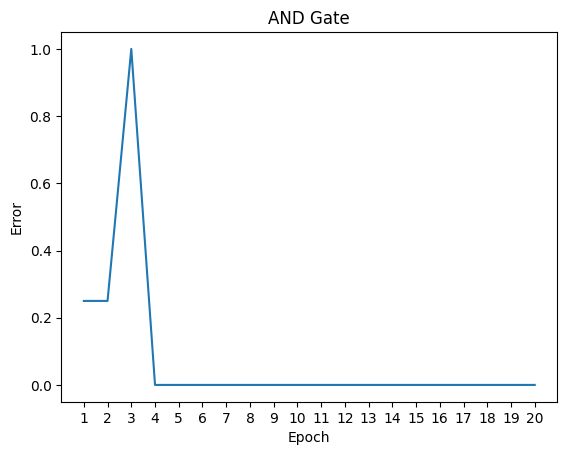

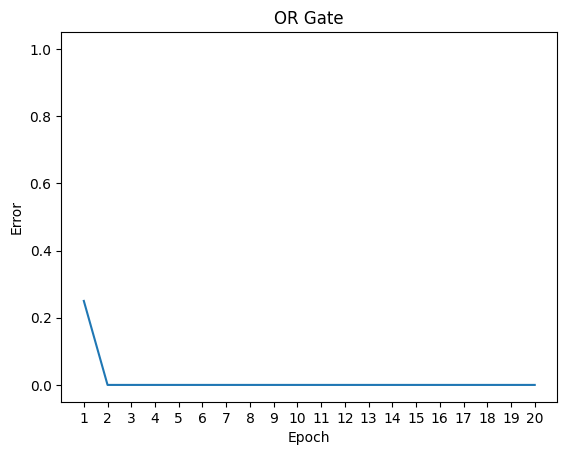

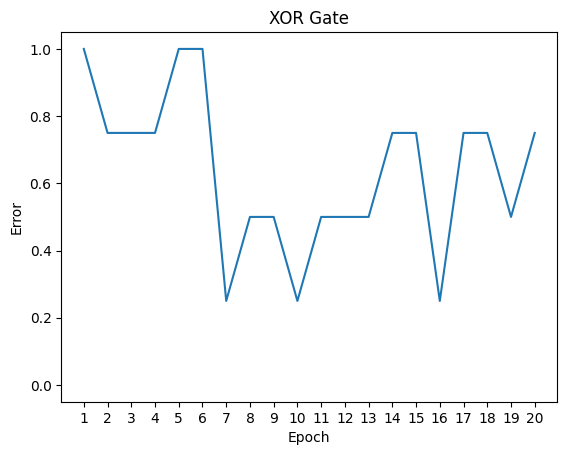

In [2]:
## Simple perceptron training

## Helper to train perceptron and plot errors
def train_and_plot_errors(title, X, Y_AND, W, b, learning_rate, epochs):
    p = Perceptron()
    W, errors = p.train(X, Y_AND, W, b, learning_rate, epochs)

    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.ylim([-0.05, 1.05])
    plt.xticks(np.arange(0, epochs+1, 1))
    plt.plot(np.arange(1,epochs+1), errors)
    plt.show()

## Training data
X = np.array([
    [1, 1],
    [1, 0],
    [0, 1],
    [0, 0],
])
Y_AND = np.array([1, 0, 0, 0])
Y_OR = np.array([1, 1, 1, 0])
Y_XOR = np.array([0, 1, 1, 0])

## Initial parameters
W = np.zeros(X.shape[1])
b = 0
learning_rate = 0.1
epochs = 20

## Train and plot errors
train_and_plot_errors("AND Gate", X, Y_AND, W, b, learning_rate, epochs)
train_and_plot_errors("OR Gate", X, Y_OR, W, b, learning_rate, epochs)
train_and_plot_errors("XOR Gate", X, Y_XOR, W, b, learning_rate, epochs)

In [3]:
## Training a full ANN

## Import and split data
X_train, y_train, X_val, y_val, X_test, y_test = three_way_split_data("../data/features.txt", "../data/targets.txt", 0.7, 0.15, 0.15)

             0         1        2         3        4        5         6  \
0     0.578550  0.821140  1.21480  0.729980  0.34868  0.99462 -0.018461   
1    -0.022322  0.476810  0.55624  0.915430  0.26883  0.14517  0.449950   
2     0.057631  0.001790  0.95442  1.050000  0.11558  0.17376 -0.153800   
3     0.640950  0.805870  0.59024 -0.023599 -0.16732  0.47218 -0.030820   
4     0.413610  0.874130  0.12846  0.124150  0.42157  0.44694  0.546020   
...        ...       ...      ...       ...      ...      ...       ...   
7849  0.744190  0.771650  0.40471  0.727210  0.10217  1.06630  0.193950   
7850  0.754380  0.046817  0.26693  0.268440  0.22838  0.83454 -0.426820   
7851  0.538330  0.169030  0.79056  0.451980 -0.15549  0.65850  0.026991   
7852  0.731060  0.487180  0.64578 -0.261140  0.83649  0.40144  0.946840   
7853  1.132600  0.500780  0.93334  0.323940  0.54819  0.11993  1.335200   

             7        8         9  target  
0     0.924710  0.24418  0.063001       7  
1     1.058

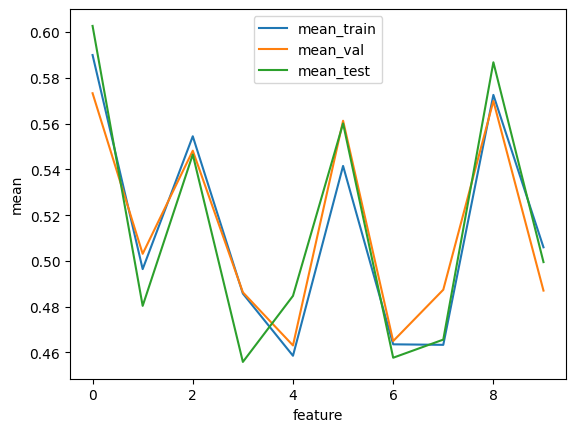

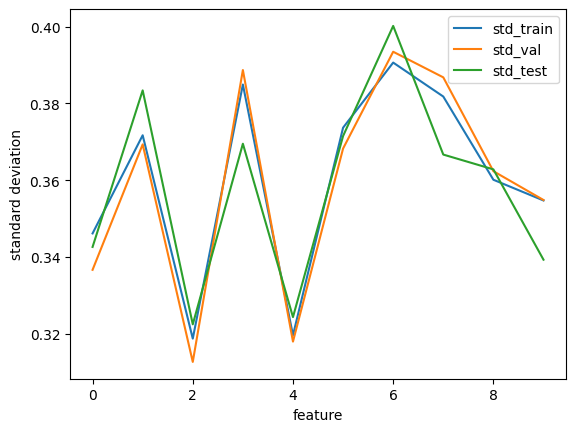

In [4]:
# Assessing identical distribution of training, validation and test sets

mean_train = np.mean(X_train, axis=0)
mean_val = np.mean(X_val.to_numpy(), axis=0)
mean_test = np.mean(X_test.to_numpy(), axis = 0)

std_train = np.std(X_train, axis=0)
std_val = np.std(X_val.to_numpy(), axis=0)
std_test = np.std(X_test.to_numpy(), axis=0)

plt.subplot(1, 1, 1)
plt.plot(mean_train)
plt.plot(mean_val)
plt.plot(mean_test)
plt.xlabel("feature")
plt.ylabel("mean")
plt.legend(["mean_train", "mean_val","mean_test"])
plt.show()

plt.subplot(1, 1, 1)
plt.plot(std_train)
plt.plot(std_val)
plt.plot(std_test)
plt.xlabel("feature")
plt.ylabel("standard deviation")
plt.legend(["std_train", "std_val", "std_test"])
plt.show()

<BarContainer object of 7 artists>

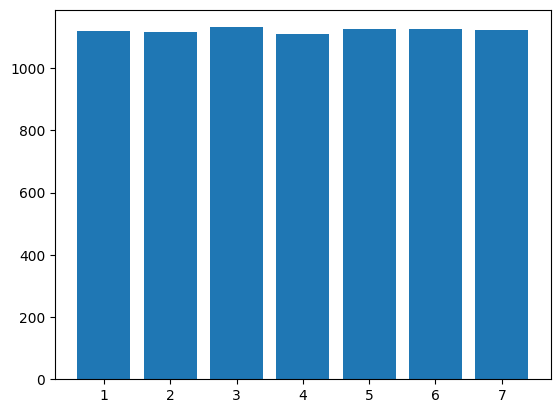

In [5]:
## Visualizing the distribution of class labels, using all the target values

targets = pd.read_csv("../data/targets.txt", header=None).astype(int)
targetsDF = pd.DataFrame(targets)
targets_1dim = targetsDF.to_numpy().flatten()
binarray = np.bincount(targets_1dim)[1:]

plt.bar(['1', '2', '3', '4', '5', '6', '7'], binarray)

In [6]:
## Set hyper parameters for ANN
hidden_layers = 1
neuron_numbers = [10, 7, 7]
epochs = 150
batch_size = 64
learning_rate = 0.1
activation_function = relu                  # sigmoid / relu
derivative_activation = derivative_relu     # derivative_sigmoid / derivative_relu (to match activation)
regularization_term = 0.1

In [7]:
## Build ANN for validation of hyperparameters
input_layer = Layer(n=neuron_numbers[0]) # No previous layer because this is the input layer

layers = [input_layer]
for i in range(hidden_layers):
    hidden_layer = Layer(neuron_numbers[i+1], layers[-1])
    hidden_biases = np.zeros(hidden_layer.n)
    hidden_layer.init_weights(deterministic=True)
    hidden_layer.set_biases(hidden_biases)
    layers.append(hidden_layer)

output_layer = Layer(neuron_numbers[-1], layers[-1], output=True)
output_biases = np.zeros(output_layer.n)
output_layer.init_weights()
output_layer.set_biases(output_biases)
layers.append(output_layer)

ann = ANN(layers, activation_function, derivative_activation)

In [8]:
## Train on the train set and evaluate on the validation set
train_losses, val_losses, train_acc, val_acc, train_confusion_matrix, val_confusion_matrix, train_predictions, val_predictions = \
    ann.train_network(X_train, y_train, X_val.to_numpy(), y_val.to_numpy(), epochs, batch_size, learning_rate, regularization_term)

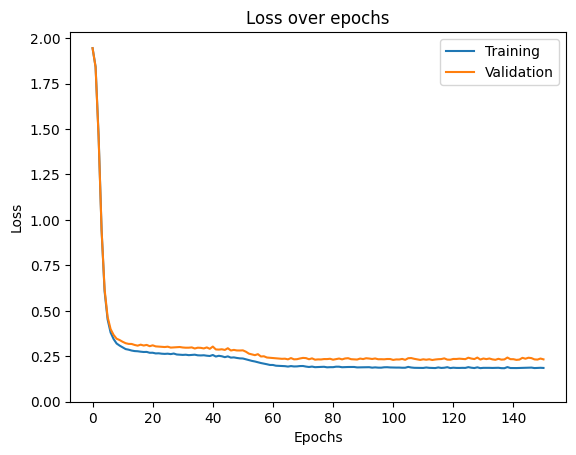

Min. training loss: 0.18428113954091108 (epoch 137)
Min. validation loss: 0.22944688725327264 (epoch 113)
Final training loss: 0.1857461433151369
Final validation loss: 0.23301653894737256


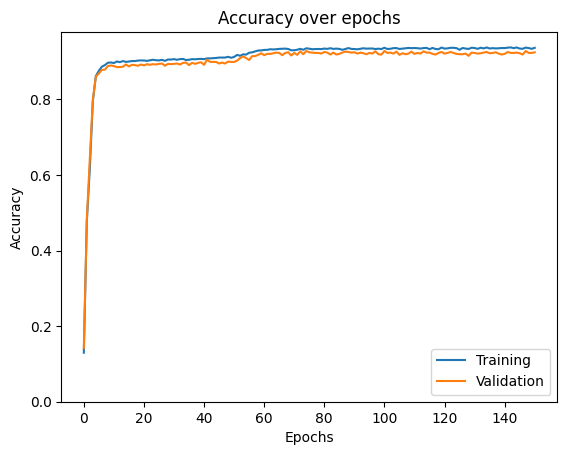

Max. training accuracy: 0.9374317933794107 (epoch 142)
Max. validation accuracy: 0.9278438030560272 (epoch 74)
Final training accuracy: 0.9363404874499818
Final validation accuracy: 0.9244482173174873


In [9]:
## Plot loss and accuracy on training and validation sets, during training
plot_lines("Loss over epochs", "Epochs", "Loss", "Training", "Validation", train_losses, val_losses, epochs)
print("Min. training loss:", min(train_losses), "(epoch " + str(np.argmin(train_losses)) + ")")
print("Min. validation loss:", min(val_losses), "(epoch " + str(np.argmin(val_losses)) + ")")
print("Final training loss:", train_losses[-1])
print("Final validation loss:", val_losses[-1])

plot_lines("Accuracy over epochs", "Epochs", "Accuracy", "Training", "Validation", train_acc, val_acc, epochs)
print("Max. training accuracy:", max(train_acc), "(epoch " + str(np.argmax(train_acc)) + ")")
print("Max. validation accuracy:", max(val_acc), "(epoch " + str(np.argmax(val_acc)) + ")")
print("Final training accuracy:", train_acc[-1])
print("Final validation accuracy:", val_acc[-1])

In [10]:
## Build a new ANN to evaluate the performance on test set
input_layer = Layer(n=neuron_numbers[0]) # No previous layer because this is the input layer

layers = [input_layer]
for i in range(hidden_layers):
    hidden_layer = Layer(neuron_numbers[i+1], layers[-1])
    hidden_biases = np.zeros(hidden_layer.n)
    hidden_layer.init_weights()
    hidden_layer.set_biases(hidden_biases)
    layers.append(hidden_layer)

output_layer = Layer(neuron_numbers[-1], layers[-1], output=True)
output_biases = np.zeros(output_layer.n)
output_layer.init_weights()
output_layer.set_biases(output_biases)
layers.append(output_layer)

ann = ANN(layers, activation_function, derivative_activation)

In [11]:
## Train on the train+validation set and evaluate on the test set
X_train_and_val = np.concatenate((X_train,X_val.to_numpy()), axis=0)
y_train_and_val = np.concatenate((y_train,y_val.to_numpy()), axis=0)

train_losses, test_losses, train_acc, test_acc, train_confusion_matrix, test_confusion_matrix, train_predictions, test_predictions = \
    ann.train_network(X_train_and_val, y_train_and_val, X_test.to_numpy(), y_test.to_numpy(),
                      epochs, batch_size, learning_rate, regularization_term)

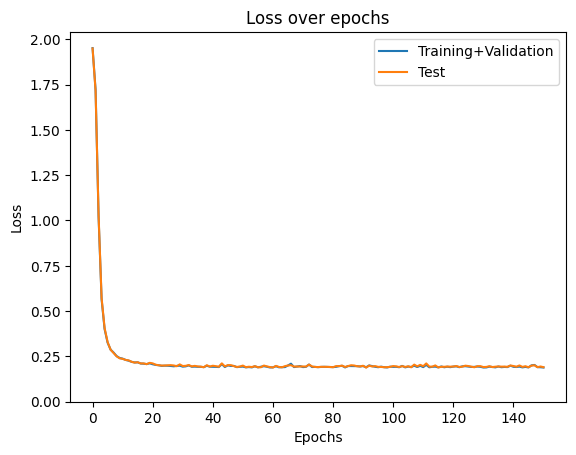

Min. training loss: 0.18870022223127553 (epoch 150)
Min. test loss: 0.18840592931814126 (epoch 91)
Final training loss: 0.18870022223127553
Final test loss: 0.1905866500570126


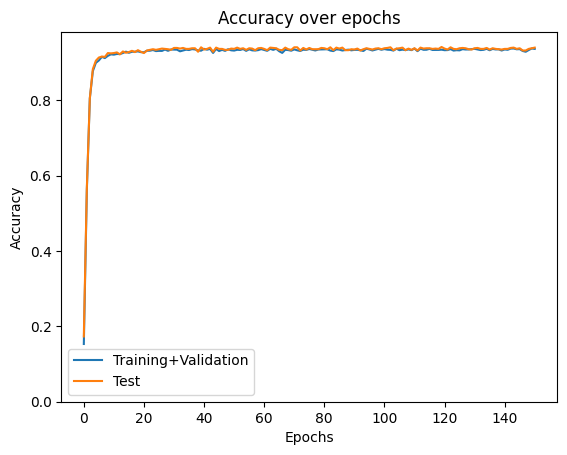

Max. training accuracy: 0.9373876572798082 (epoch 143)
Max. test accuracy: 0.9414261460101867 (epoch 119)
Final training accuracy: 0.9363391252246854
Final test accuracy: 0.9397283531409168


In [12]:
## Plot loss and accuracy on the new training set (i.e. training+validation set) compared to the test set, during training
plot_lines("Loss over epochs", "Epochs", "Loss", "Training+Validation", "Test", train_losses, test_losses, epochs)
print("Min. training loss:", min(train_losses), "(epoch " + str(np.argmin(train_losses)) + ")")
print("Min. test loss:", min(test_losses), "(epoch " + str(np.argmin(test_losses)) + ")")
print("Final training loss:", train_losses[-1])
print("Final test loss:", test_losses[-1])

plot_lines("Accuracy over epochs", "Epochs", "Accuracy", "Training+Validation", "Test", train_acc, test_acc, epochs)
print("Max. training accuracy:", max(train_acc), "(epoch " + str(np.argmax(train_acc)) + ")")
print("Max. test accuracy:", max(test_acc), "(epoch " + str(np.argmax(test_acc)) + ")")
print("Final training accuracy:", train_acc[-1])
print("Final test accuracy:", test_acc[-1])

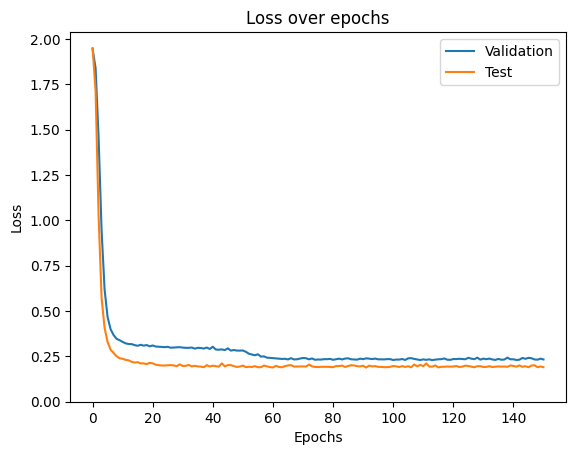

Min. validation loss: 0.22944688725327264 (epoch 113)
Min. test loss: 0.18840592931814126 (epoch 91)
Final validation loss: 0.23301653894737256
Final test loss: 0.1905866500570126


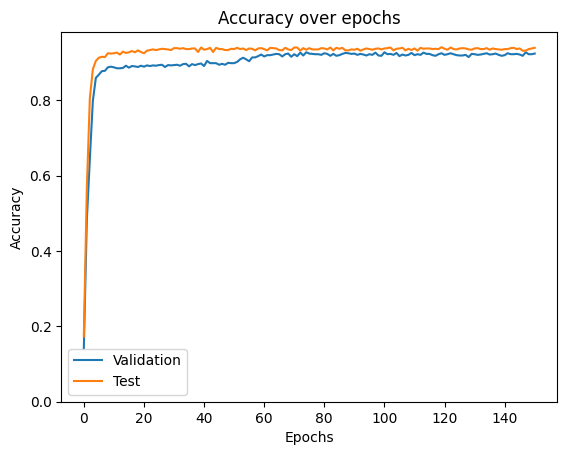

Max. validation accuracy: 0.9278438030560272 (epoch 74)
Max. test accuracy: 0.9414261460101867 (epoch 119)
Final validation accuracy: 0.9244482173174873
Final test accuracy: 0.9397283531409168


In [13]:
## Plot loss and accuracy on validation set (from the previous network) compared to the test set (from the current network), during training
plot_lines("Loss over epochs", "Epochs", "Loss", "Validation", "Test", val_losses, test_losses, epochs)
print("Min. validation loss:", min(val_losses), "(epoch " + str(np.argmin(val_losses)) + ")")
print("Min. test loss:", min(test_losses), "(epoch " + str(np.argmin(test_losses)) + ")")
print("Final validation loss:", val_losses[-1])
print("Final test loss:", test_losses[-1])

plot_lines("Accuracy over epochs", "Epochs", "Accuracy", "Validation", "Test", val_acc, test_acc, epochs)
print("Max. validation accuracy:", max(val_acc), "(epoch " + str(np.argmax(val_acc)) + ")")
print("Max. test accuracy:", max(test_acc), "(epoch " + str(np.argmax(test_acc)) + ")")
print("Final validation accuracy:", val_acc[-1])
print("Final test accuracy:", test_acc[-1])

In [14]:
## Display confusion matrix for test set
pd.DataFrame(test_confusion_matrix)

,0,1,2,3,4,5,6
0,142.0,0.0,3.0,2.0,2.0,0.0,1.0
1,0.0,149.0,0.0,0.0,1.0,1.0,1.0
2,4.0,3.0,186.0,1.0,6.0,0.0,4.0
3,4.0,0.0,0.0,153.0,1.0,1.0,3.0
4,2.0,0.0,6.0,2.0,162.0,4.0,0.0
5,4.0,1.0,0.0,1.0,1.0,155.0,2.0
6,4.0,1.0,1.0,2.0,0.0,2.0,160.0


In [15]:
# Running an ANN 10 times with different initial weights in order to evaluate the impact of initialization on performance

train_losses_10 = []
val_losses_10 = []
train_accs_10 = []
val_accs_10 = []
train_cm_10 = []
val_cm_10 = []
labels = []

for i in range(12):
    print("\n\nTraining sequence " + str(i) + " starting\n\n")
    input_layer = Layer(n=neuron_numbers[0]) # No previous layer because this is the input layer

    layers = [input_layer]
    for l in range(hidden_layers):
        hidden_layer = Layer(neuron_numbers[l+1], layers[-1])
        hidden_biases = np.zeros(hidden_layer.n)
        if i == 0:
            hidden_layer.set_weights(np.zeros((hidden_layer.n, hidden_layer.prev_layer.n))) # Adds one network with weights set to 0
        elif i == 1:
            hidden_layer.set_weights(np.ones((hidden_layer.n, hidden_layer.prev_layer.n))) # Adds one network with weights set to 1
            hidden_biases = np.ones(hidden_layer.n)
        else:
            hidden_layer.init_weights(deterministic=False) #ensures that the weights initialized in each run is different
        hidden_layer.set_biases(hidden_biases)
        layers.append(hidden_layer)

    output_layer = Layer(neuron_numbers[-1], layers[-1], output=True)
    output_biases = np.zeros(output_layer.n)
    if i == 0:
        output_layer.set_weights(np.zeros((output_layer.n, output_layer.prev_layer.n)))
        labels.append("Zero initialisation")
    elif i == 1:
        output_layer.set_weights(np.ones((output_layer.n, output_layer.prev_layer.n)))
        output_biases = np.ones(output_layer.n)
        labels.append("Ones initialisation")
    else:
        output_layer.init_weights(deterministic=False)
        labels.append(None)

    output_layer.set_biases(output_biases)
    layers.append(output_layer)

    ann2 = ANN(layers, activation_function, derivative_activation)

    train_loss, val_loss, train_acc, val_acc, train_confusion_matrix, val_confusion_matrix, train_predictions, val_predictions = \
    ann2.train_network(X_train, y_train, X_val.to_numpy(), y_val.to_numpy(), epochs, batch_size, learning_rate, regularization_term)

    train_losses_10.append(train_loss)
    val_losses_10.append(val_loss)
    train_accs_10.append(train_acc)
    val_accs_10.append(val_acc)
    train_cm_10.append(train_confusion_matrix)
    val_cm_10.append(val_confusion_matrix)

    print("\n\nTraining sequence " + str(i) + " ended\n\n")



Training sequence 0 starting




Training sequence 0 ended




Training sequence 1 starting




Training sequence 1 ended




Training sequence 2 starting




Training sequence 2 ended




Training sequence 3 starting




Training sequence 3 ended




Training sequence 4 starting




Training sequence 4 ended




Training sequence 5 starting




Training sequence 5 ended




Training sequence 6 starting




Training sequence 6 ended




Training sequence 7 starting




Training sequence 7 ended




Training sequence 8 starting




Training sequence 8 ended




Training sequence 9 starting




Training sequence 9 ended




Training sequence 10 starting




Training sequence 10 ended




Training sequence 11 starting




Training sequence 11 ended




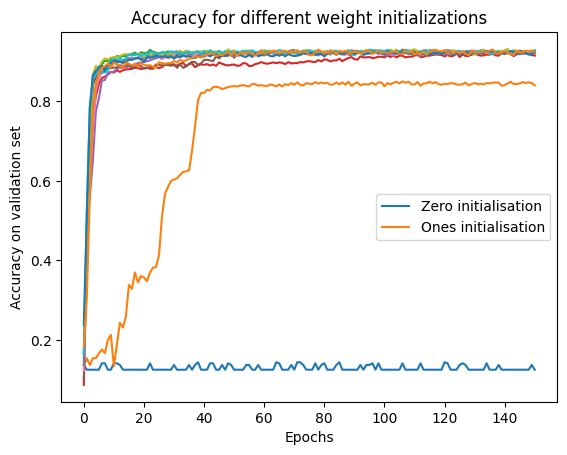

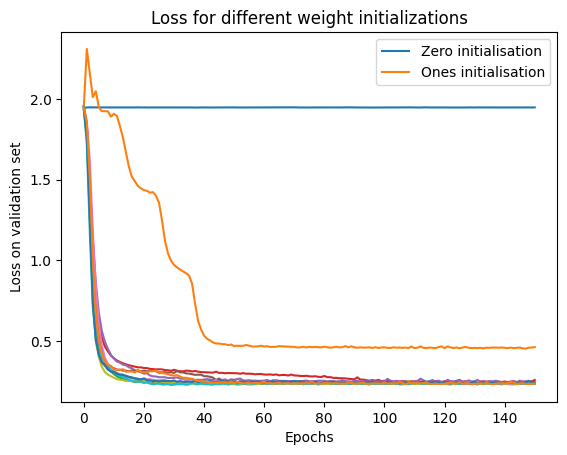

In [17]:
## Plot the loss and accuracy for all the different initial weights, during training
n = len(val_accs_10)
for i in range(n):
    plt.plot(val_accs_10[i], label=labels[i])
plt.title("Accuracy for different weight initializations")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy on validation set")
plt.show()

len_loss = len(val_losses_10)
for i in range(len_loss):
    plt.plot(val_losses_10[i], label=labels[i])
plt.title("Loss for different weight initializations")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss on validation set")
plt.show()

In [18]:
## k-cross-validation to determine the best number of hidden neurons
hidden_neuron_numbers = [7, 8, 10, 15, 20, 30] # potential numbers of neurons to be tested
k = 10

avg_max_accuracies = []
avg_final_accuracies = []
avg_min_losses = []
avg_final_losses = []
for n in hidden_neuron_numbers:
    print(n, "hidden neurons:")

    ## Train k-times and determine average accuracy
    avg_max_acc = 0
    avg_final_acc = 0
    avg_min_loss = 0
    avg_final_loss = 0
    for i in range(k):
        print("Validation", i+1)

        ## Build ANN with given number of hidden neurons
        input_layer = Layer(n=neuron_numbers[0])

        layers = [input_layer]
        hidden_layer = Layer(n, layers[-1])
        hidden_biases = np.zeros(hidden_layer.n)
        hidden_layer.init_weights()
        hidden_layer.set_biases(hidden_biases)
        layers.append(hidden_layer)

        output_layer = Layer(neuron_numbers[-1], layers[-1], output=True)
        output_biases = np.zeros(output_layer.n)
        output_layer.init_weights()
        output_layer.set_biases(output_biases)
        layers.append(output_layer)

        ann_cross_validation = ANN(layers, activation_function, derivative_activation)

        ## Load data for current batch
        X_batches = np.array_split(X_train, k)
        y_batches = np.array_split(y_train, k)
        X_val = X_batches.pop(i)
        y_val = y_batches.pop(i)
        X_train = np.concatenate(X_batches)
        y_train = np.concatenate(y_batches)

        ## Train ANN
        train_losses, val_losses, train_acc, val_acc, train_confusion_matrix, val_confusion_matrix, train_predictions, val_predictions = \
            ann_cross_validation.train_network(X_train, y_train, X_val, y_val, epochs, batch_size, learning_rate)

        ## Update accuracy and loss
        avg_final_acc += val_acc[-1]
        avg_max_acc += max(val_acc)
        avg_final_loss += val_losses[-1]
        avg_min_loss += min(val_losses)

    ## Store average accuracy for given number of neurons
    avg_final_accuracies.append(avg_final_acc/k)
    avg_max_accuracies.append(avg_max_acc/k)
    avg_min_losses.append(avg_min_loss/k)
    avg_final_losses.append(avg_final_loss/k)
    print()

7 hidden neurons:
Validation 1
Validation 2
Validation 3
Validation 4
Validation 5
Validation 6
Validation 7
Validation 8
Validation 9
Validation 10

8 hidden neurons:
Validation 1
Validation 2
Validation 3
Validation 4
Validation 5
Validation 6
Validation 7
Validation 8
Validation 9
Validation 10

10 hidden neurons:
Validation 1
Validation 2
Validation 3
Validation 4
Validation 5
Validation 6
Validation 7
Validation 8
Validation 9
Validation 10

15 hidden neurons:
Validation 1
Validation 2
Validation 3
Validation 4
Validation 5
Validation 6
Validation 7
Validation 8
Validation 9
Validation 10

20 hidden neurons:
Validation 1
Validation 2
Validation 3
Validation 4
Validation 5
Validation 6
Validation 7
Validation 8
Validation 9
Validation 10

30 hidden neurons:
Validation 1
Validation 2
Validation 3
Validation 4
Validation 5
Validation 6
Validation 7
Validation 8
Validation 9
Validation 10



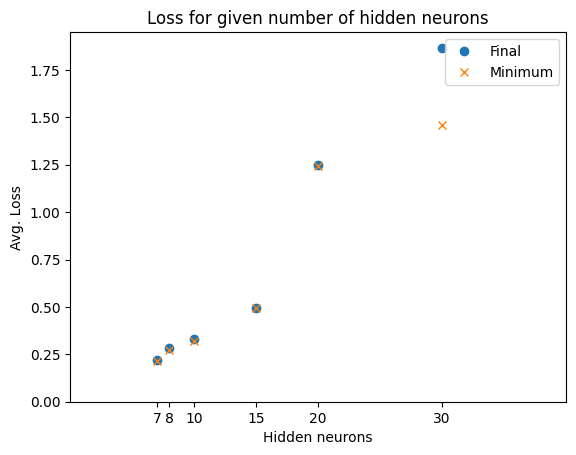

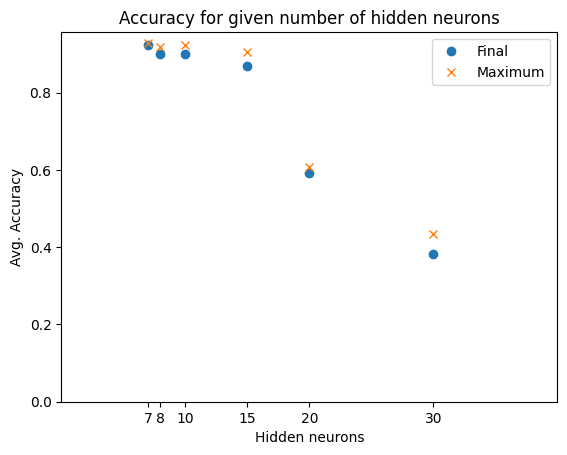

In [19]:
## Plot average loss and accuracy for all chosen numbers of hidden neurons
plot_points("Loss for given number of hidden neurons", "Hidden neurons", "Avg. Loss", "Final", "Minimum",
           avg_final_losses, avg_min_losses, hidden_neuron_numbers)
plot_points("Accuracy for given number of hidden neurons", "Hidden neurons", "Avg. Accuracy", "Final", "Maximum",
            avg_final_accuracies, avg_max_accuracies, hidden_neuron_numbers)

In [20]:
## Train ANN on all labeled data and make predictions for the unknown set

## Load data
X_train, y_train, X_val, y_val, X_test, y_test = three_way_split_data("../data/features.txt", "../data/targets.txt", 0.7, 0.15, 0.15)
X_all = np.concatenate((X_train, X_val.to_numpy(), X_test.to_numpy()), axis=0)
y_all = np.concatenate((y_train, y_val.to_numpy(), y_test.to_numpy()), axis=0)
X_unknown = pd.read_csv("../data/unknown.txt", header=None).astype(float)

## Predictions made on the unknown set by a scikit-learn network (for comparison)
check_predictions = [2, 6, 7, 1, 6, 5, 1, 3, 7, 7, 3, 3, 1, 3, 6, 4, 2, 4, 2, 2, 7, 5,
                    6, 6, 5, 1, 1, 3, 1, 6, 6, 4, 4, 4, 4, 4, 5, 2, 2, 7, 4, 6, 5, 5,
                    5, 7, 5, 4, 5, 1, 5, 5, 2, 1, 6, 3, 1, 4, 1, 1, 3, 6, 3, 2, 7, 2,
                    2, 2, 7, 7, 7, 6, 7, 1, 4, 1, 4, 4, 1, 7, 1, 7, 6, 4, 4, 2, 1, 2,
                    1, 7, 6, 2, 7, 1, 2, 7, 2, 2, 5, 2, 5, 7, 5, 5, 2, 6, 5, 6, 2, 3,
                    7, 4, 1, 5, 5, 7, 6, 2, 4, 4, 7, 1, 2, 1, 1, 4, 7, 4, 7, 7, 7, 6,
                    6, 7, 7, 4, 4, 4, 3, 5, 3, 4, 1, 3, 2, 6, 6, 5, 4, 4, 7, 4, 1, 7,
                    1, 3, 7, 4, 3, 6, 7, 7, 3, 4, 1, 5, 6, 2, 5, 5, 3, 1, 6, 4, 7, 3,
                    3, 5, 5, 1, 3, 4, 1, 1, 2, 3, 3, 2, 5, 3, 4, 6, 1, 6, 6, 2, 2, 3,
                    6, 7, 7, 2, 5, 3, 5, 6, 7, 4, 2, 2, 5, 6, 2, 6, 6, 4, 2, 6, 1, 7,
                    1, 3, 6, 2, 2, 6, 7, 1, 6, 1, 1, 5, 2, 4, 5, 4, 4, 4, 7, 7, 4, 1,
                    5, 5, 3, 1, 1, 6, 6, 5, 4, 4, 6, 2, 6, 6, 6, 1, 5, 3, 5, 3, 3, 6,
                    1, 2, 6, 6, 6, 2, 4, 5, 3, 5, 3, 3, 4, 7, 6, 4, 3, 6, 7, 7, 2, 7,
                    7, 2, 1, 4, 6, 3, 4, 5, 4, 6, 4, 7, 4, 4, 2, 1, 2, 5, 2, 2, 1, 3,
                    3, 1, 1, 7, 2, 4, 6, 4, 2, 2, 6, 5, 5, 6, 1, 4, 4, 7, 5, 6, 7, 3,
                    4, 6, 4, 1, 5, 1, 7, 5, 4, 3, 2, 1, 7, 6, 2, 2, 5, 4, 2, 1, 4, 7,
                    6, 4, 1, 5, 4, 4, 6, 7, 3, 1, 3, 1, 1, 4, 7, 4, 7, 2, 3, 2, 3, 2,
                    2, 1, 3, 1, 7, 7, 4, 3, 5, 7, 1, 1, 2, 7, 2, 3, 6, 7, 4, 5, 7, 6,
                    1, 3, 4, 4, 6, 1, 2, 1, 5, 7, 4, 1, 1, 1, 5, 4, 2, 2, 7, 7, 4, 2,
                    3, 4, 2, 4, 7, 1, 2, 6, 7, 7, 5, 1, 7, 4, 6, 3, 7, 3, 5, 3, 2, 3,
                    1, 4, 1, 6, 4, 4, 6, 1, 1, 2, 4, 5, 5, 7, 6, 6, 4, 2, 7, 7, 5, 3,
                    5, 1, 4, 5, 3, 4, 6, 3, 2, 5, 6, 7, 3, 4, 1, 3, 3, 6, 1, 1, 7, 2,
                    2, 4, 1, 6, 5, 3, 6, 5, 3, 6, 7, 4, 2, 7, 4, 7, 3, 7, 3, 3, 1, 2,
                    3, 7, 7, 7, 2, 3, 1, 6, 1, 6, 5, 4, 7, 3, 1, 5, 4, 6, 2, 2, 3, 6,
                    4, 2, 1, 2, 6, 5, 4, 3, 4, 4, 5, 6, 7, 1, 1, 2, 2, 5, 2, 1, 2, 7,
                    2, 2, 1, 4, 3, 7, 4, 7, 1, 2, 4, 5, 5, 3, 7, 2, 7, 4, 6, 7, 3, 6,
                    5, 7, 1, 7, 4, 5, 4, 6, 3, 4, 1, 7, 4, 2, 6, 2, 6, 4, 1, 6, 4, 5,
                    4, 5, 1, 4, 4, 2, 2, 6, 1, 3, 1, 5, 5, 2, 3, 5, 3, 5, 4, 5, 1, 6,
                    4, 4, 6, 6, 7, 7, 4, 1, 6, 4, 7, 4, 2, 5, 1, 4, 3, 6, 6, 1, 2, 1,
                    6, 4, 1, 5, 6, 3, 1, 1, 7, 1, 6, 3, 2, 1, 7, 7, 4, 5, 3, 6, 6, 7,
                    2, 5, 1, 7, 6, 4, 1, 6, 6, 2, 1, 1, 1, 1, 6, 4, 5, 6, 2, 5, 3, 4,
                    1, 4, 4, 3, 4, 2, 5, 4, 7, 4, 6, 4, 2, 1, 5, 5, 6, 3, 5, 3, 4, 1,
                    3, 2, 1, 4, 2, 5, 2, 4, 2, 6, 6, 1, 7, 4, 6, 5, 7, 3, 7, 1, 7, 4,
                    7, 6, 4, 2, 5, 6, 4, 2, 4, 2, 2, 3, 1, 5, 2, 3, 6, 5, 7, 3, 7, 3,
                    3, 6, 6, 3, 3, 7, 4, 5, 3, 7, 6, 2, 6, 7, 3, 5, 1, 4, 1, 4, 6, 6,
                    3, 7, 2, 2, 5, 5, 7, 2, 2, 2, 2, 6, 2, 1]

## Set hyper parameters
hidden_layers = 1
neuron_numbers = [10, 7, 7]
epochs = 150
batch_size = 64
learning_rate = 0.1
activation_function = relu  # sigmoid / relu
derivative_activation = derivative_relu  # derivative_sigmoid / derivative_relu (to match activation)
regularization_term = 0.1

## Build ANN
input_layer = Layer(n=neuron_numbers[0])  # No previous layer because this is the input layer

layers = [input_layer]
for i in range(hidden_layers):
    hidden_layer = Layer(neuron_numbers[i + 1], layers[-1])
hidden_biases = np.zeros(hidden_layer.n)
hidden_layer.init_weights(deterministic=True)
hidden_layer.set_biases(hidden_biases)
layers.append(hidden_layer)

output_layer = Layer(neuron_numbers[-1], layers[-1], output=True)
output_biases = np.zeros(output_layer.n)
output_layer.init_weights()
output_layer.set_biases(output_biases)
layers.append(output_layer)

ann_unknown = ANN(layers, activation_function, derivative_activation)

## Train on all labeled data, make prediction on the unknown set and compare to the predictions made by scikit-learn
train_losses, test_losses, train_acc, test_acc, train_confusion_matrix, test_confusion_matrix, train_predictions, test_predictions = \
    ann_unknown.train_network(X_all, y_all, X_unknown.to_numpy(), check_predictions,
                              epochs, batch_size, learning_rate, regularization_term)

             0         1        2         3        4        5         6  \
0     0.578550  0.821140  1.21480  0.729980  0.34868  0.99462 -0.018461   
1    -0.022322  0.476810  0.55624  0.915430  0.26883  0.14517  0.449950   
2     0.057631  0.001790  0.95442  1.050000  0.11558  0.17376 -0.153800   
3     0.640950  0.805870  0.59024 -0.023599 -0.16732  0.47218 -0.030820   
4     0.413610  0.874130  0.12846  0.124150  0.42157  0.44694  0.546020   
...        ...       ...      ...       ...      ...      ...       ...   
7849  0.744190  0.771650  0.40471  0.727210  0.10217  1.06630  0.193950   
7850  0.754380  0.046817  0.26693  0.268440  0.22838  0.83454 -0.426820   
7851  0.538330  0.169030  0.79056  0.451980 -0.15549  0.65850  0.026991   
7852  0.731060  0.487180  0.64578 -0.261140  0.83649  0.40144  0.946840   
7853  1.132600  0.500780  0.93334  0.323940  0.54819  0.11993  1.335200   

             7        8         9  target  
0     0.924710  0.24418  0.063001       7  
1     1.058

In [21]:
def removeprefix(input_string, prefix) -> str:
    if input_string.startswith(prefix):
        return input_string[len(prefix):]
    else:
        return input_string[:]


def removesuffix(input_string, suffix) -> str:
    # suffix='' should not call self[:-0].
    if suffix and input_string.endswith(suffix):
        return input_string[:-len(suffix)]
    else:
        return input_string[:]

In [25]:
## Export predictions
file = open('../data/predictions.txt', "w")
content = removeprefix(str(test_predictions),"[").removesuffix("]").replace("\n", "").replace(" ", "")
file.write(content)
file.close()

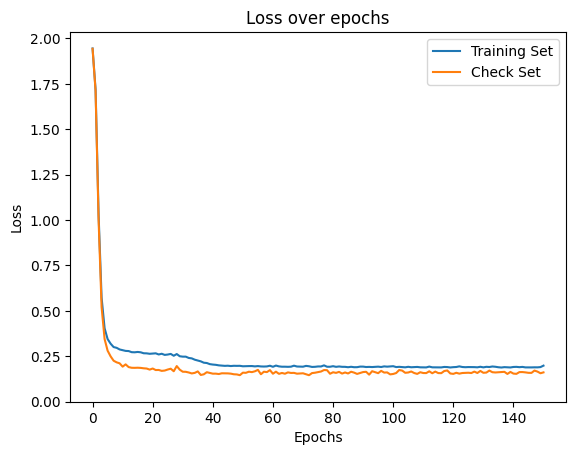

Min. training loss: 0.18833219995399927 (epoch 136)
Min. check loss: 0.14598769127549607 (epoch 72)
Final training loss: 0.1986148124051092
Final check loss: 0.16156349747329807


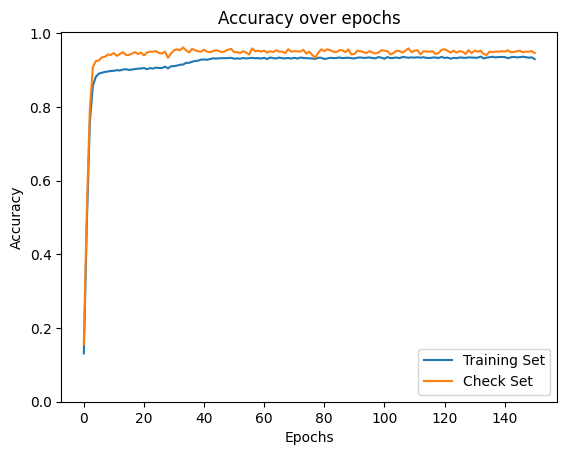

Max. training accuracy: 0.936847466259231 (epoch 132)
Max. check accuracy: 0.9617346938775511 (epoch 33)
Final training accuracy: 0.9298446651387828
Final check accuracy: 0.9464285714285714


In [23]:
## Plot loss and accuracy on training set (all labeled data) compared to the unknown set (with scikit-learn labels), during training
plot_lines("Loss over epochs", "Epochs", "Loss", "Training Set", "Check Set", train_losses, test_losses, epochs)
print("Min. training loss:", min(train_losses), "(epoch " + str(np.argmin(train_losses)) + ")")
print("Min. check loss:", min(test_losses), "(epoch " + str(np.argmin(test_losses)) + ")")
print("Final training loss:", train_losses[-1])
print("Final check loss:", test_losses[-1])

plot_lines("Accuracy over epochs", "Epochs", "Accuracy", "Training Set", "Check Set", train_acc, test_acc, epochs)
print("Max. training accuracy:", max(train_acc), "(epoch " + str(np.argmax(train_acc)) + ")")
print("Max. check accuracy:", max(test_acc), "(epoch " + str(np.argmax(test_acc)) + ")")
print("Final training accuracy:", train_acc[-1])
print("Final check accuracy:", test_acc[-1])